In [1]:
#Importing all required packages
import numpy as np
np.random.seed(42)

import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
#add other imports here

In [2]:
#Loading Dataset with relative path
dataFrame = pd.read_csv('energydata_complete.csv')

In [8]:
procData = dataFrame.dropna(how = 'all', axis = 1, inplace = False)
# Removing rows with null values
procData = procData.dropna() 
# Combining Appliances and Lights column as new Power column
procData['Power'] = procData['Appliances'].astype(int) + procData['lights'].astype(int)
# Drop the old Appliance column
procData = procData.drop('Appliances', axis = 1);
# Drop the old lights column
procData = procData.drop('lights', axis = 1);
# Drop the date column as it is not of importance for our study
procData = procData.drop('date', axis = 1);   
# Drop the other columns which are not of importance for our study
procData = procData.drop(['rv1','rv2'], axis=1)

# Defining the X (input) and y(target variable) for our study
X= procData.drop(['Power'], axis = 1)
y = procData["Power"] 

# Splitting the data, keeping 30% as reserved for testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size =0.30, random_state=42)
  
# printing a view of the Processed Dataframe
print(procData)


              T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
...          ...        ...        ...        ...        ...        ...   
19730  25.566667  46.560000  25.890000  42.025714  27.200000  41.163333   
19731  25.500000  46.500000  25.754000  42.080000  27.133333  41.223333   
19732  25.500000  46.596667  25.628571  42.768571  27.050000  41.690000   
19733  25.500000  46.990000  25.414000  43.036000  26.890000  41.290000   
19734  25.500000  46.600000  25.264286  42.971429  26.823333  41.156667   

              T4       RH_4         T5       RH_5  ...       RH_8         T9  \
0      19.000000  4

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)


In [10]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(Xtrain.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)


# Compiling the model
model.compile(optimizer= optimizer, loss='mean_squared_error', metrics=['mae'])

# Training the model
history = model.fit(X_train_scaled, ytrain, epochs=70, batch_size=32, validation_split=0.2)


Epoch 1/70
346/346 [==============================] - 2s 3ms/step - loss: 11156.0811 - mae: 61.4287 - val_loss: 10482.9150 - val_mae: 57.4103
Epoch 2/70
346/346 [==============================] - 1s 2ms/step - loss: 10169.8984 - mae: 57.6991 - val_loss: 10632.5605 - val_mae: 49.5102
Epoch 3/70
346/346 [==============================] - 1s 2ms/step - loss: 9988.8457 - mae: 56.9244 - val_loss: 10109.5713 - val_mae: 51.4218
Epoch 4/70
346/346 [==============================] - 1s 2ms/step - loss: 9902.3887 - mae: 56.2406 - val_loss: 9873.0576 - val_mae: 53.4702
Epoch 5/70
346/346 [==============================] - 1s 2ms/step - loss: 9749.0615 - mae: 55.8025 - val_loss: 10349.9482 - val_mae: 48.5258
Epoch 6/70
346/346 [==============================] - 1s 3ms/step - loss: 9673.4424 - mae: 55.1177 - val_loss: 9824.0049 - val_mae: 61.4787
Epoch 7/70
346/346 [==============================] - 1s 3ms/step - loss: 9611.0869 - mae: 55.1197 - val_loss: 9751.1289 - val_mae: 53.3589
Epoch 8/70
346

In [11]:
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Calculate the metrics
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)

# Print the results
print('R2 score:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

186/186 [==============================] - 0s 1ms/step
R2 score: 0.15744600291470157
MAE: 52.481074483465896
MSE: 8997.657691063398
RMSE: 94.85598394968763


In [12]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, ytest)

print(f"Test loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


186/186 [==============================] - 0s 1ms/step - loss: 8997.6602 - mae: 52.4811
Test loss: 8997.6602
Test MAE: 52.4811


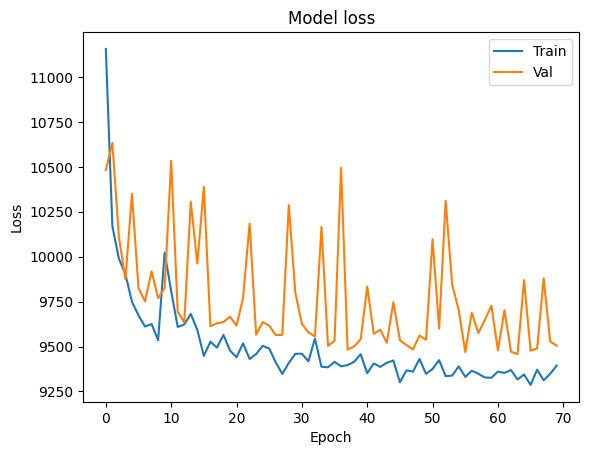

Text(0.5, 0, '')

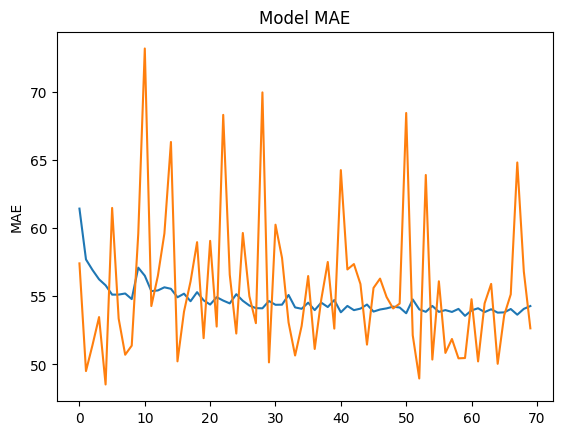

In [13]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot the training and validation MAE
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('')


In [14]:

# Defining the model architecture, with hyper parameter tuning using learninh rate 0.01 and epochs as 200
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(Xtrain.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)


# Compiling the model
model.compile(optimizer= optimizer, loss='mean_squared_error', metrics=['mae'])

# Training the model
history = model.fit(X_train_scaled, ytrain, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200
346/346 [==============================] - 3s 5ms/step - loss: 11125.2832 - mae: 62.0221 - val_loss: 10797.0713 - val_mae: 66.7244
Epoch 2/200
346/346 [==============================] - 1s 3ms/step - loss: 10119.9756 - mae: 57.8984 - val_loss: 10263.6152 - val_mae: 54.9107
Epoch 3/200
346/346 [==============================] - 1s 2ms/step - loss: 9893.6367 - mae: 56.7907 - val_loss: 10064.7832 - val_mae: 54.1263
Epoch 4/200
346/346 [==============================] - 1s 2ms/step - loss: 9672.7979 - mae: 56.0631 - val_loss: 9945.4131 - val_mae: 58.1125
Epoch 5/200
346/346 [==============================] - 1s 2ms/step - loss: 9749.2324 - mae: 56.1321 - val_loss: 9955.8369 - val_mae: 52.4770
Epoch 6/200
346/346 [==============================] - 1s 2ms/step - loss: 9563.8701 - mae: 55.4983 - val_loss: 10264.9697 - val_mae: 49.9124
Epoch 7/200
346/346 [==============================] - 1s 2ms/step - loss: 9576.5459 - mae: 55.2575 - val_loss: 9725.5645 - val_mae: 54.9694
Epoch 8

In [15]:
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Calculate the metrics
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)

# Print the results
print('R2 score:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

186/186 [==============================] - 0s 1ms/step
R2 score: 0.16709703059551662
MAE: 56.8182240682485
MSE: 8894.5940966358
RMSE: 94.3111557379921


We see that on doing hyper parameter tuning the 
R2 score improves from 0.15 to 0.16 and MAE increases from 52.48 to 56.81 and finally MSE and RMSE is seen to increase slightly.